# **The Loudness of Spotify Tracks Over Time**

<div style="background-color: #f0f0f0; padding: 10px; border-bottom: 1px solid #ccc; text-align: left;">
    <a href="1_main.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Data Setup</a> | 
    <a href="2_visualization.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Visualization</a> | 
    <a href="3_model.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Model and Conclusion</a>
</div>

# Model and Conclusion

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/tracks.csv')

df['duration_min'] = df['duration_ms'] / 60000

# Remove rows without release dates
df = df.dropna(subset=['release_date'])

# Convert ISO8601 date YYYY-MM-DD to just YYYY
df['release_year'] = pd.to_datetime(df['release_date'], format='ISO8601').dt.year

# Attempt to trim off excessively long tracks like podcasts
df_sub = df[
    (df['duration_min'] < 15) &
    (df['release_year'] >= 1921)
    ].copy()

## [5] Train and Test Regression Model

### [5.1] Simple Linear Regression Model

I observed a strong positive correlation between release_year and loudness in my heatmap analysis. To quantify this relationship, I selected a Simple Linear Regression model. I will use release_year as my predictor, and loudness as my target.

I used [this](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4/) guide to help me build the simple linear regression model.

### [5.2] Create Train and Test Sets

In [16]:
from sklearn.model_selection import train_test_split

# Creating X and y
X = df_sub['release_year']
y = df_sub['loudness']

# Splitting the variables as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# print('X_train: \n', X_train, '\n')
# print('y_train: \n', y_train, '\n')
# print('X_test: \n', X_test, '\n')
# print('y_test: \n', y_test, '\n')

In [17]:
# Shape of the train set without adding column
X_train.shape
print('Before:', X_train.shape)

# Adding additional column to the train and test data
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

print('After:', X_train.shape)

Before: (409203,)
After: (409203, 1)


### [5.3] Building and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train, y_train)

print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : -208.18548049738712
Slope : [0.09956473]


### [5.4] Evaluating the Model

In [19]:
from sklearn.metrics import r2_score

# Making Predictions of y_value
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Comparing the r2 value of both train and test data
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

if abs(r2_train - r2_test) / r2_test < 0.05:
    print(f'R2 train score is: {r2_train:.4f}, R2 test score is: {r2_test:.4f}')
    print('R2 score of train and test data is within 5%; We can conclude that the model is pretty stable.')

R2 train score is: 0.1998, R2 test score is: 0.1997
R2 score of train and test data is within 5%; We can conclude that the model is pretty stable.


In [20]:
year_to_predict = [[2030]]

predicted_loudness = lm.predict(year_to_predict)

print(f"Predicted average loudness for a song in 2030: {predicted_loudness[0]:.2f} dB")


Predicted average loudness for a song in 2030: -6.07 dB


### [5.5] Visualizing the Model

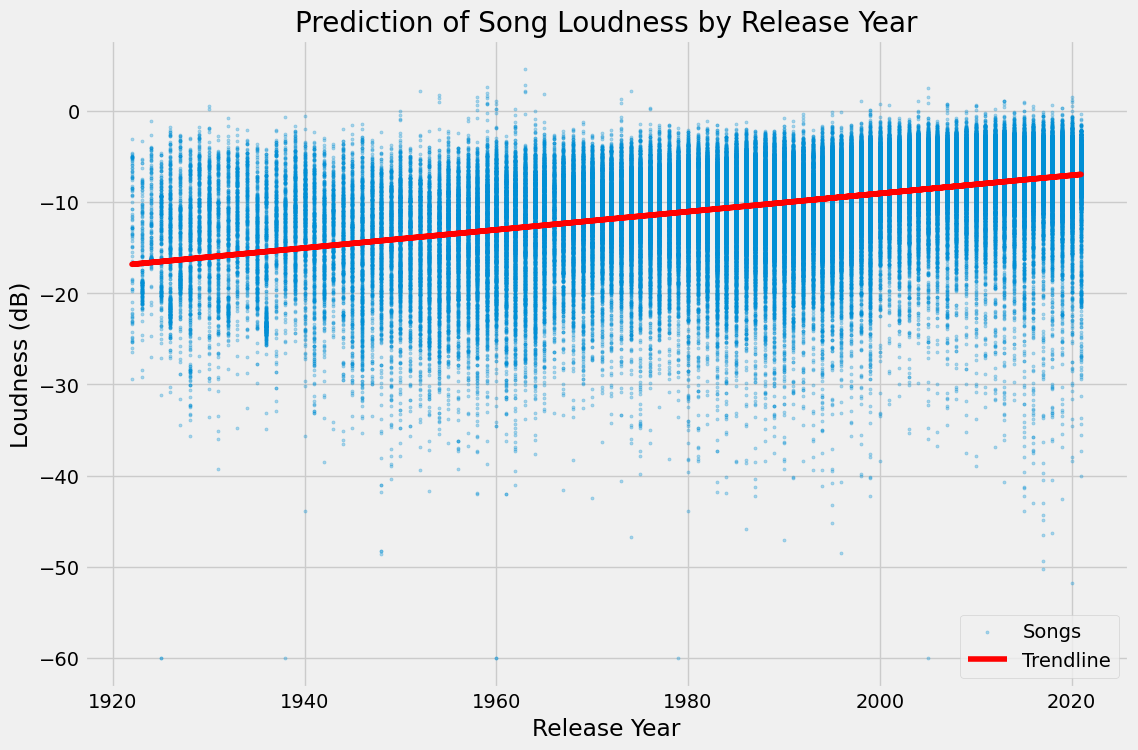

In [21]:
# Change style of Matplotlib
plt.style.use('fivethirtyeight')

# Visualize the line on the test set
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, alpha=0.3, s=5, label='Songs')
plt.plot(X_test, y_test_pred, 'r', label='Trendline')
plt.xlabel('Release Year')
plt.ylabel('Loudness (dB)')
plt.title('Prediction of Song Loudness by Release Year')
plt.legend()
plt.show()

### [6] Conclusion

#### **Summary**
This project confirms the "Loudness War" hypothesis: popular music has become significantly louder over the last century. The EDA revealed a consistent upward trend in song volume from 1921 to 2020, with tracks steadily approaching a maximum of 0dB. Additionally, a strong positive correlation was observed between release_year and loudness, while song duration has notably decreased since 2000, reflecting the influence of streaming economics.

#### **Model Usage**
Using Simple Linear Regression, the growth of loudness can be quantified, proving that release time is a statistically significant predictor of loudness. The model successfully captures the general historical trend and predicts that music will continue to get louder in the near future.

#### **Limitations**
The limitations of the model are that it assumes a linear increase that ignores the physical 0dB limit of digital audio, meaning it cannot account for the 'flattening' of the curve as music hits maximum volume. Despite this limitation, the analysis provides evidence that current music is louder than the music of the past.